In [2]:
#Read dataframes
import pandas as pd
df_airlines = pd.read_csv('/Users/hannapedersen/Documents/NOVA/T3/Advanced Programming/Assignment/flight_data/airlines.csv')
df_airplanes = pd.read_csv('/Users/hannapedersen/Documents/NOVA/T3/Advanced Programming/Assignment/flight_data/airplanes.csv', on_bad_lines='skip')
df_airports = pd.read_csv('/Users/hannapedersen/Documents/NOVA/T3/Advanced Programming/Assignment/flight_data/airports.csv', on_bad_lines='skip')
df_routes =  pd.read_csv('/Users/hannapedersen/Documents/NOVA/T3/Advanced Programming/Assignment/flight_data/routes.csv', on_bad_lines='skip')


,index,Airport ID,Name,City,Country,IATA,ICAO,Latitude,Longitude,Altitude,Timezone,DST,Tz database time zone,Type,Source
0,0,1,Goroka Airport,Goroka,Papua New Guinea,GKA,AYGA,-6.081690,145.391998,5282,10,U,Pacific/Port_Moresby,airport,OurAirports
1,1,2,Madang Airport,Madang,Papua New Guinea,MAG,AYMD,-5.207080,145.789001,20,10,U,Pacific/Port_Moresby,airport,OurAirports
2,2,3,Mount Hagen Kagamuga Airport,Mount Hagen,Papua New Guinea,HGU,AYMH,-5.826790,144.296005,5388,10,U,Pacific/Port_Moresby,airport,OurAirports
3,3,4,Nadzab Airport,Nadzab,Papua New Guinea,LAE,AYNZ,-6.569803,146.725977,239,10,U,Pacific/Port_Moresby,airport,OurAirports
4,4,5,Port Moresby Jacksons International Airport,Port Moresby,Papua New Guinea,POM,AYPY,-9.443380,147.220001,146,10,U,Pacific/Port_Moresby,airport,OurAirports
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7693,7693,14106,Rogachyovo Air Base,Belaya,Russia,\N,ULDA,71.616699,52.478298,272,\N,\N,\N,airport,OurAirports
7694,7694,14107,Ulan-Ude East Airport,Ulan Ude,Russia,\N,XIUW,51.849998,107.737999,1670,\N,\N,\N,airport,OurAirports
7695,7695,14108,Krechevitsy Air Base,Novgorod,Russia,\N,ULLK,58.625000,31.385000,85,\N,\N,\N,airport,OurAirports
7696,7696,14109,Desierto de Atacama Airport,Copiapo,Chile,CPO,SCAT,-27.261200,-70.779198,670,\N,\N,\N,airport,OurAirports


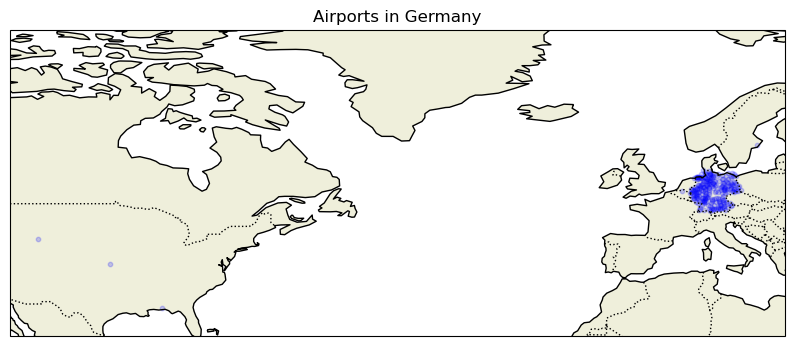

In [61]:
import pandas as pd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Airport function with outliers

def airport_map_cartopy(country):
    # Filter airports for the given country
    airports_country = df_airports[df_airports['Country'] == country]

    # Check if any airports exist for the given country
    if airports_country.empty:
        print(f"No airports found for {country}")
        return

    # Create a plot with Cartopy
    fig, ax = plt.subplots(figsize=(10, 6), subplot_kw={'projection': ccrs.PlateCarree()})
    ax.add_feature(cfeature.LAND)
    ax.add_feature(cfeature.COASTLINE)
    ax.add_feature(cfeature.BORDERS, linestyle=':')

    
    ax.set_extent([airports_country['Longitude'].min()-5, airports_country['Longitude'].max()+5,
                   airports_country['Latitude'].min()-5, airports_country['Latitude'].max()+5])

    # Plot airports
    plt.scatter(airports_country['Longitude'], airports_country['Latitude'], 
                c='blue', s=10, alpha=0.2, transform=ccrs.PlateCarree())

    ax.set_title(f'Airports in {country}')
    plt.show()

# Example usage
airport_map_cartopy('Germany')


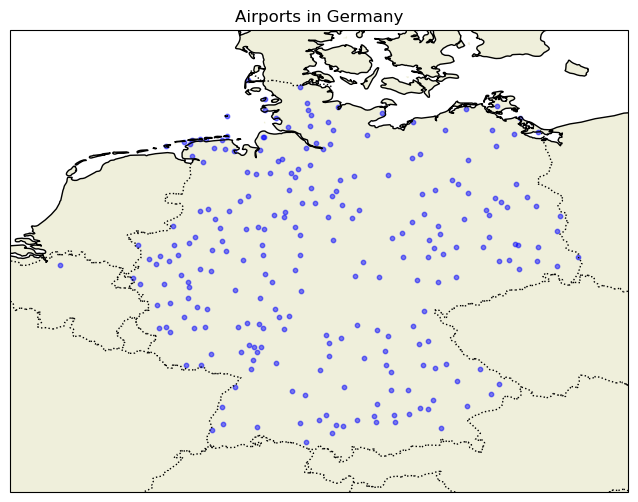

In [62]:
import pandas as pd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

#Airports function - without outleirs
def airport_map_cartopy(country, std_dev_threshold=2):
    # Filter airports for the given country
    airports_country = df_airports[df_airports['Country'] == country]

    # Check if any airports exist for the given country
    if airports_country.empty:
        print(f"No airports found for {country}")
        return
    
    # Calculate median and standard deviation for latitude and longitude
    median_lat = airports_country['Latitude'].median()
    median_lon = airports_country['Longitude'].median()
    std_lat = airports_country['Latitude'].std()
    std_lon = airports_country['Longitude'].std()

    # Filter out airports that are far from the median location
    airports_filtered = airports_country[
        (airports_country['Latitude'] < median_lat + std_dev_threshold * std_lat) &
        (airports_country['Latitude'] > median_lat - std_dev_threshold * std_lat) &
        (airports_country['Longitude'] < median_lon + std_dev_threshold * std_lon) &
        (airports_country['Longitude'] > median_lon - std_dev_threshold * std_lon)
    ]

    # Create a plot with Cartopy
    fig, ax = plt.subplots(figsize=(10, 6), subplot_kw={'projection': ccrs.PlateCarree()})
    ax.add_feature(cfeature.LAND)
    ax.add_feature(cfeature.COASTLINE)
    ax.add_feature(cfeature.BORDERS, linestyle=':')

    # Set extent to the filtered airports' boundaries
    ax.set_extent([
        airports_filtered['Longitude'].min()-1, airports_filtered['Longitude'].max()+1,
        airports_filtered['Latitude'].min()-1, airports_filtered['Latitude'].max()+1
    ], crs=ccrs.PlateCarree())

    # Plot airports
    plt.scatter(airports_filtered['Longitude'], airports_filtered['Latitude'], 
                c='blue', s=10, alpha=0.5, transform=ccrs.PlateCarree())

    ax.set_title(f'Airports in {country}')
    plt.show()

# Example usage
airport_map_cartopy('Germany')
